# MODELING REACTION NETWORKS

In [2]:
try:
    import controlSBML as ctl
except:
    !pip install controlSBML
    import controlSBML as ctl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tellurium as te

     |████████████████████████████████| 357 kB 9.9 MB/s 
     |████████████████████████████████| 8.7 MB 50.5 MB/s 
     |████████████████████████████████| 154 kB 55.5 MB/s 
     |████████████████████████████████| 414 kB 54.2 MB/s 
     |████████████████████████████████| 6.9 MB 35.4 MB/s 
     |████████████████████████████████| 121 kB 49.2 MB/s 
     |████████████████████████████████| 341 kB 50.5 MB/s 
     |████████████████████████████████| 428 kB 43.5 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 130 kB 53.8 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 79 kB 8.7 MB/s 
     |████████████████████████████████| 133 kB 59.6 MB/s 
     |████████████████████████████████| 103 kB 58.3 MB/s 
     |████████████████████████████████| 254 kB 57.0 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |███████████████████

# Helpers

In [3]:
def simulateAndPlot(roadrunner, start_time=0, end_time=5, num_point=50, variables=None, is_species=True, is_plot=True):
    """
    Runs a simulation and plots the variables.
    
    Parameters
    ----------
    roadrunner: ExtendedRoadrunner
    variables: list-str
    
    Returns
    -------
    Timeseries
    """
    if variables is None:
        if is_species:
            variables = ["time", "S1", "S2", "S3"]
        else:
            variables = ["time", "J0", "J1", "J2"]
    roadrunner.reset()
    ts = ctl.Timeseries(roadrunner.simulate(start_time, end_time, num_point, variables))
    if is_plot:
        ctl.plotOneTS(ts, figsize=(6, 4))
    return ts
    
# Tests
model = "S1->; S2*S3; S1=0; S2=0; S3=0"
rr = te.loada(model)
simulateAndPlot(rr, is_plot=False)
print("OK!")

OK!


In [24]:
def formatMat(mat, column_names=None, row_names=None):
    """
    Provides a nice format for a matrix.

    Parameters
    ----------
    mat: np.Array, NamedArray
    column_names: list-str
    row_names: list-str
    """
    if len(np.shape(mat)) == 1:
        mat = np.reshape(mat, (len(mat), 1))
    if column_names is None:
        if ("NamedArray" in str(type(mat))):
            column_names = mat.colnames
        else:
            column_names = range(np.shape(mat)[1])
    if row_names is None:
        if ("NamedArray" in str(type(mat))):
            row_names = mat.rownames
        else:
            row_names = range(np.shape(mat)[0])
    return pd.DataFrame(mat, columns=column_names, index=row_names)

# Tests
mat = np.array(range(10))
result1 = formatMat(mat, column_names=["a"])
mat = np.reshape(mat, (5,2))
result2 = formatMat(mat, column_names=["a", "b"])
#result1, result2
print("OK!")

OK!


In [16]:
len(np.shape(mat))

1

# Sequential Pathway With Mass Action Kinetics, No Input Boundary

In [4]:
SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY = """
J0: -> S1; k0
J1: S1->S2; k1*S1
J2: S2 -> S3; k2*S2

k0 = 0
k1 = 1
k2 = 1
S1 = 10
S2 = 0
S3 = 0
"""

RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY = te.loada(SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY)

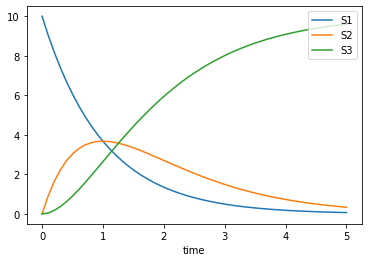

In [5]:
_ = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY)

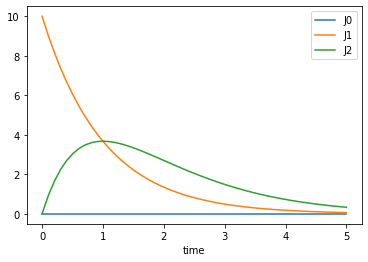

In [6]:
_ = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY, variables=["time", "J0", "J1", "J2"])

What the species flux vector? ${\bf{v}_S} =$

The Jacobian of the species rate equations describes the flux values.
$J({\bf v}_S) = \frac{\partial {\bf v}_S}{\partial {\bf x}}$.

$\frac{\partial {\bf S1}}{\partial {S_1}} = $, $\frac{\partial {\bf S1}}{\partial {S_2}} = $

$\frac{\partial {\bf S2}}{\partial {S_1}} = $, $\frac{\partial {\bf S2}}{\partial {S_2}} = $

In [26]:
formatMat(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY.getFullJacobian())


,S1,S2,S3
S1,-1.0,0.0,0.0
S2,1.0,-1.0,0.0
S3,0.0,1.0,0.0


# Sequential Pathway With Mass Action Kinetics, With Input Boundary

In [8]:
SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY = """
J0: -> S1; k0
J1: S1->S2; k1*S1
J2: S2 -> S3; k2*S2

k0 = 1 # Created an input rate
k1 = 1
k2 = 1
S1 = 10
S2 = 0
S3 = 0
"""

RR_SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY = te.loada(SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY)

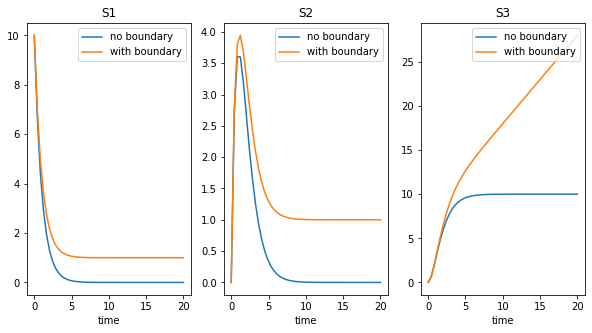

In [9]:
ts1 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY, end_time=20, is_plot=False)
ts2 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY, end_time=20, is_plot=False)
ctl.plotManyTS(ts1, ts2, ncol=3, figsize=(10, 5), names=["no boundary", "with boundary"])

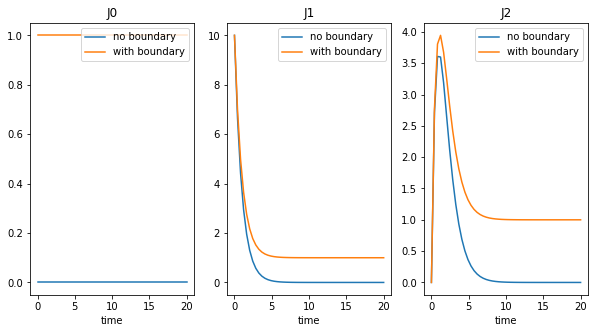

In [10]:
ts1 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY, is_species=False, end_time=20, is_plot=False)
ts2 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY, is_species=False, end_time=20, is_plot=False)
ctl.plotManyTS(ts1, ts2, ncol=3, figsize=(10, 5),  names=["no boundary", "with boundary"])

# mTOR